In [1]:
# Configure Jupyter so figures appear in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import threading

In [2]:
m = UNITS.meter
s = UNITS.second
kg =UNITS.kilogram

<Unit('kilogram')>

In [3]:
t_end=5e12 * s
##1e9
# init=State(x1=1e12*m,
#            y1=1e12*m,
#            vx1=4000*m/s,
#            vy1=0*m/s,
#            x2=-1e12*m,
#            y2=-1e12*m,
#            vx2=0*m/s,
#            vy2=0*m/s)

x1=0
y1=0
vx1=0
vy1=0

x2=1.3925*1000000000000
y2=0
vx2=0
vy2=19986
m1=1.989e30
m2=1.989e30*1.1



velocity1=Vector(vx1,vy1)
velocity2=Vector(vx2,vy2)
position1=Vector(x1,y1)
position2=Vector(x2,y2)
com_position=(position1*m1+position2*m2)/(m1+m2)
com_velocity=(velocity1*m1+velocity2*m2)/(m1+m2)
print(com_position,com_velocity)

# r=np.sqrt((init.x1-init.x2)**2+(init.y1-init.y2)**2)
# r1=(system.m2/(system.m1+system.m2))*r
# r2=(system.m1/(system.m1+system.m2))*r
# theta=np.arcsin((init.x1-init.x2)/r)


init=State(x1=x1-com_position.x,
           y1=y1-com_position.y,
           vx1=vx1-com_velocity.x,
           vy1=vy1-com_velocity.y,
           x2=x2-com_position.x,
           y2=y2-com_position.y,
           vx2=vx2-com_velocity.x,
           vy2=vy2-com_velocity.y)

# init=State(x1=r1*np.sin(theta)*m,
#            y1=r1*np.cos(theta)*m,
#            vx1=init.vx1-com_velocity.x,
#            vy1=init.vy1-com_velocity.y,
#            x2=r2*np.sin(pi+theta)*m,
#            y2=r2*np.cos(pi+theta)*m,
#            vx2=init.vx2-com_velocity.x,
#            vy2=init.vy2-com_velocity.y)
system = System(init=init, 
                m1=m1, 
                m2=m2, 
                G=6.67e-11, 
                t_end=t_end)
init




[7.29404762e+11 0.00000000e+00] dimensionless [    0.         10468.85714286] dimensionless


,values
x1,-729404761904.7618 dimensionless
y1,-0.0 dimensionless
vx1,-0.0 dimensionless
vy1,-10468.857142857143 dimensionless
x2,663095238095.2382 dimensionless
y2,-0.0 dimensionless
vx2,-0.0 dimensionless
vy2,9517.142857142857 dimensionless


In [37]:
def ode1(system,slope_func):
    global results1
    results,details=run_ode_solver(system, slope_func)
    number=results.shape[0]
    x1= [0]*number
    x2=[0]*number
    y1= [0]*number
    y2=[0]*number
    number=results.shape[0]
    x1= [0]*number
    x2=[0]*number
    y1= [0]*number
    y2=[0]*number
    for i in linrange(0,number):
        time=results.index[i]
        x1[i]=results.x1[time]+com_velocity.x*time
        x2[i]=results.x2[time]+com_velocity.x*time
        y1[i]=results.y1[time]+com_velocity.y*time
        y2[i]=results.y2[time]+com_velocity.y*time
    results1=[[x1],[y1],[x2],[y2]]
def ode2(system,slope_func):
    global results2
    results,details=run_ode_solver(system, slope_func)
    number=results.shape[0]
    x1= [0]*number
    x2=[0]*number
    y1= [0]*number
    y2=[0]*number
    number=results.shape[0]
    x1= [0]*number
    x2=[0]*number
    y1= [0]*number
    y2=[0]*number
    for i in linrange(0,number):
        time=results.index[i]
        x1[i]=results.x1[time]+com_velocity.x*time
        x2[i]=results.x2[time]+com_velocity.x*time
        y1[i]=results.y1[time]+com_velocity.y*time
        y2[i]=results.y2[time]+com_velocity.y*time
    results2=[[x1],[y1],[x2],[y2]]

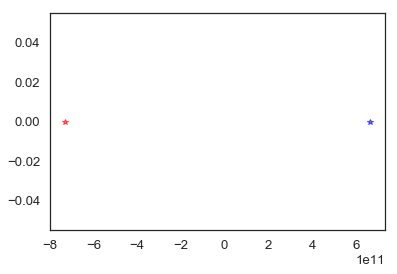

In [38]:
plot(init.x1,init.y1,'*',color='red')
plot(init.x2,init.y2,'*',color='blue')

In [39]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x1,y1,vx1,vy1,x2,y2,vx2,vy2 = state
    unpack(system)
    velocity1=Vector(vx1,vy1)
    position1=Vector(x1,y1)
    velocity2=Vector(vx2,vy2)
    position2=Vector(x2,y2)
    r=sqrt((x1-x2)**2+(y1-y2)**2)
    force=-G*m1*m2/(r**2)

    acceleration1=force/m1
    acceleration2=force/m2
    dx1dt=vx1
    dy1dt=vy1
    dx2dt=vx2
    dy2dt=vy2
    theta1=position1.angle
    theta2=position2.angle
    dvx1dt,dvy1dt=pol2cart(theta1,acceleration1)
    dvx2dt,dvy2dt=pol2cart(theta2,acceleration2)
#     dvx1dt=acceleration1*np.cos(theta1)
#     dvy1dt=acceleration1*np.sin(theta1)
#     dvx2dt=acceleration2*np.cos(theta2)
#     dvy2dt=acceleration2*np.sin(theta2)
    

    
    return dx1dt,dy1dt,dvx1dt,dvy1dt,dx2dt,dy2dt,dvx2dt,dvy2dt

In [40]:

t1 = threading.Thread(ode1(system,slope_func)) 
t2 = threading.Thread(ode2(system,slope_func)) 
  
    # starting thread 1 
t1.start() 
    # starting thread 2 
t2.start() 
  
    # wait until thread 1 is completely executed 
t1.join() 
    # wait until thread 2 is completely executed 
t2.join() 
  
    # both threads completely executed 
print("Done!") 

Done!


In [41]:
results1

[[[<Quantity(-729404761904.7618, 'dimensionless')>,
   <Quantity(-729404761904.7618, 'dimensionless')>,
   <Quantity(-729404761904.7618, 'dimensionless')>,
   <Quantity(-729404761904.7618, 'dimensionless')>,
   <Quantity(-729404761904.7618, 'dimensionless')>,
   <Quantity(-729404761904.7618, 'dimensionless')>,
   <Quantity(-729404761904.7618, 'dimensionless')>,
   <Quantity(-729404761904.7618, 'dimensionless')>,
   <Quantity(-729404761904.7617, 'dimensionless')>,
   <Quantity(-729404761904.7526, 'dimensionless')>,
   <Quantity(-729404761903.8335, 'dimensionless')>,
   <Quantity(-729404761811.9288, 'dimensionless')>,
   <Quantity(-729404752621.462, 'dimensionless')>,
   <Quantity(-729403833575.5645, 'dimensionless')>,
   <Quantity(-729311936761.2755, 'dimensionless')>,
   <Quantity(-720198867454.5222, 'dimensionless')>,
   <Quantity(-561640130683.8052, 'dimensionless')>,
   <Quantity(-135332948827.58984, 'dimensionless')>,
   <Quantity(621229756180.6622, 'dimensionless')>,
   <Quantity(

In [ ]:
plot(results.x1,results.y1,'red')
plot(results.x2,results.y2,'blue')

In [ ]:
plot(results.x1,results.index)
plot(results.y1,results.index)
plot(results.x2,results.index)
plot(results.y2,results.index)

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot(results.x1, results.y1, results.index)
ax.plot(results.x2, results.y2, results.index)
plt.show()


In [ ]:
number=results.shape[0]
x1= [0]*number
x2=[0]*number
y1= [0]*number
y2=[0]*number
'none'

In [ ]:
# for i in linrange(0,number):
#     time=results.index[i]
#     results.x1[time]+=com_velocity.x*time
#     results.x2[time]+=com_velocity.x*time
#     results.y1[time]+=com_velocity.y*time
#     results.y2[time]+=com_velocity.y*time
    
for i in linrange(0,number):
    time=results.index[i]
    x1[i]=results.x1[time]+com_velocity.x*time
    x2[i]=results.x2[time]+com_velocity.x*time
    y1[i]=results.y1[time]+com_velocity.y*time
    y2[i]=results.y2[time]+com_velocity.y*time

In [ ]:
plot(x1,y1,'red')
plot(x2,y2,'blue')
plt.xlim(-2e12,2e12)
plt.ylim(0,4e12)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot(x1, y1, linrange(0,number))
ax.plot(x2, y2, linrange(0,number))
plt.show()


In [ ]:
get_last_label(results.x1)


In [24]:
get_last_label(results.x2)
a=(x1,x2,y1,y2)

NameError: name 'results' is not defined